Number of hits = 4
Number of misses = 36
Number of strikes on target = 10.0 %


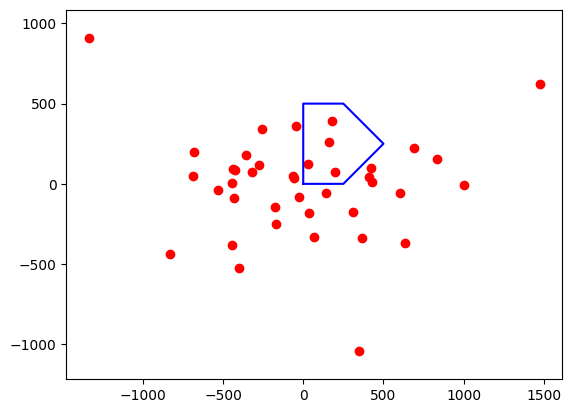

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# Define the polygonal target as a set of boundary points
target_vertices = [(0, 0), (0, 500), (250, 500), (500, 250), (250, 0) , (0, 0)]

# Create a Polygon object from the boundary points
target_shape = Polygon(target_vertices)

# Set the standard deviations for the strike coordinates
standard_deviation_x = 500
standard_deviation_y = 300

# Set the number of simulations and strikes per simulation
number_of_simulation = 1
number_of_strike_each_simulation = 40

# Loop over the simulations
for i in range(number_of_simulation):
    hit = 0
    miss = 0
    point_x = []
    point_y = []
    
    # Loop over the strikes in each simulation
    for i in range(number_of_strike_each_simulation):
        # Generate random strike coordinates
        normal_random_num = np.random.randn()
        current_x = standard_deviation_x * normal_random_num
        normal_random_num = np.random.randn()
        current_y = standard_deviation_y * normal_random_num
        point_x.append(current_x)
        point_y.append(current_y)
        
        # Check if the strike coordinates fall within the target shape
        strike_point = Point(current_x, current_y)
        if target_shape.contains(strike_point):
            hit += 1
        else:
            miss += 1
    
    # Print simulation results
    print("Number of hits =", hit)
    print("Number of misses =", miss)
    print("Number of strikes on target =", round(((hit/number_of_strike_each_simulation)*100), 2), "%")
    
    # Plot the target shape and the strike points
    target_x, target_y = zip(*target_vertices)
    plt.plot(target_x, target_y, color="blue")
    plt.scatter(point_x, point_y, color="red")
    plt.axis('equal')
    plt.show()
